In [1]:
from lxml import etree, objectify
FILENAME = "sochi2.xml"

with open(FILENAME) as f:
    xml = f.read()
    
root = objectify.fromstring(xml)

road = []           #текущий массив
roads = []          #массив с количеством дорог, в каждой дороге указаны узлы

way = root.way
for row in way:     #пробегаем по каждой дороге
    tag = row.find("tag")
    if not (tag is None) and tag.attrib['k'] == 'highway':
        nd = row.nd          #список узлов
        for ref in nd:       #пробег по каждому узлу
            road.append(float(ref.attrib['ref']))
        roads.append(road)
        road = []
        
print len(roads)
node = root.node             #список всех узлов
nodes = {float(row.attrib['id']): [float(row.attrib['lat']), float(row.attrib['lon'])] for row in node}  
#словарь, по номеру узла выдает координаты
print len(nodes)


7902
240988


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# fig = plt.gcf()
# fig.set_size_inches(56, 41)    #установка красивого размера полотна
# Lon_Lat = []

# for road in roads:                 #проход по всем дорогам
#     for index_node_in_road in road:     #проход по всем индексам узлов в дорогах
#         Lon_Lat.append([nodes.get(index_node_in_road)[1], nodes.get(index_node_in_road)[0]])
#     Lon_Lat = np.array(Lon_Lat)   
#     plt.plot(Lon_Lat[::, 0], Lon_Lat[::, 1], 'blue')
#     Lon_Lat = []
    
# fig.set_size_inches(56, 41, forward=True)
# fig.savefig('test_sochi3.png', dpi=100)
# plt.show()


In [3]:
#словарь, в котором номеру узла соответствует количество его вхождений в дороги
count_node_in_roads = {float(row.attrib['id']): 0 for row in node}

for road in roads:
    for nd in road:
        count_node_in_roads[float(nd)] = count_node_in_roads[float(nd)] + 1
        
#словарь, в котором номеру узла соответствует количество ребер ему инцидентных 
count_edge_in_roads = {float(row.attrib['id']): 0 for row in node}
for road in roads:
    for i in range(len(road) - 1):
        count_edge_in_roads[road[i]] = count_edge_in_roads[road[i]] + 1
        count_edge_in_roads[road[i + 1]] = count_edge_in_roads[road[i + 1]] + 1
        
#массив необходимых к удалению узлов
nodes_to_delete = []
for nd in nodes:
    if count_node_in_roads[nd] == 0 or (count_node_in_roads[float(nd)] == 1 and count_edge_in_roads[float(nd)] == 2):
        nodes_to_delete.append(nd)
    
for nd in nodes_to_delete:
    nodes.pop(nd)

In [ ]:
#новый график
# Lon_Lat = []
# fig = plt.gcf()
# fig.set_size_inches(56, 41)

# for road in roads:
#     for index_node_in_road in road:
#         if nodes_to_delete in nodes:
#             Lon_Lat.append([nodes.get(index_node_in_road)[1], nodes.get(index_node_in_road)[0]])
#     Lon_Lat = np.array(Lon_Lat)   
#     plt.plot(Lon_Lat[::, 0], Lon_Lat[::, 1], 'blue')
#     Lon_Lat = []
        
# fig.savefig('testo_sochi.png', dpi=100)
# plt.show()

In [4]:
#словарь списка смежности
list_adj = {nd:[] for nd in nodes}


In [5]:
row = []

for road in roads:
    for nd in road:
        if nd in nodes:        #если узел в этой дороге не лишний, записываем в текущую строку
            row.append(nd)
    for i in range(len(row) - 1):   #две соседние точки в троке образуют ребро, запишем это в список
        list_adj[row[i]].append(float(row[i+1]))
        list_adj[row[i+1]].append(float(row[i]))
    row = []

In [6]:
#убираем повторения в списке смежности
for key in list_adj:
    list_adj[key] = list(set(list_adj[key]))


KeyboardInterrupt: 

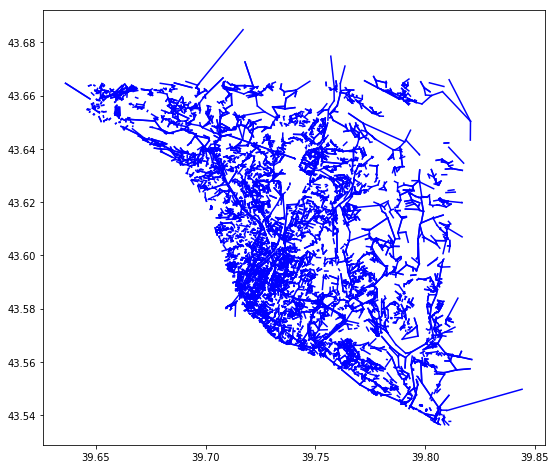

In [9]:
#на проверочку
fig = plt.gcf()
fig.set_size_inches(9, 8)

for key in list_adj:
    for nd in list_adj[key]:
        plt.plot([nodes[key][1],nodes[nd][1]], [nodes[key][0],nodes[nd][0]], 'blue')
fig.savefig('testo_sochi2.png', dpi=100)
plt.show()

In [10]:
import csv

#записываем список смежности
line_csv = []
with open("list_sochi.csv", "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    for key in list_adj:
        line_csv.append(key)
        for r in list_adj[key]:
            line_csv.append(r)
        writer.writerow(line_csv)
        line_csv = []
        

In [8]:
#записываем матрицу смежности
import csv

line = []
lline = np.zeros(len(list_adj) + 1)      

with open("matr_sochi.csv", "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    
    line.append(0)
    for key in list_adj:
        line.append(key)
    writer.writerow(line)
    
    for key in list_adj:
        for nd in list_adj[key]:
            lline[0] = key
            lline[line.index(nd)] = 1
        writer.writerow(lline)
        lline = np.zeros(len(list_adj) + 1)      
